[View in Colaboratory](https://colab.research.google.com/github/sandroormeno/Tensorflow-basic-examples/blob/master/tf_para_artistas_mnist.ipynb)

In [0]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt


from tensorflow.examples.tutorials.mnist import input_data

In [73]:
#Comprobamos si podemos utilizar la gpu para procesar
import tensorflow as tf
nombre_device = tf.test.gpu_device_name()
if nombre_device != "/device:GPU:0":
  raise SystemError("GPU no encontrado")
print("GPU encontrado en: {}".format(nombre_device))

GPU encontrado en: /device:GPU:0


In [74]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


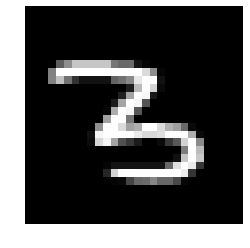

In [84]:
#función  para ver una imagen
def ver_imagen(i):
    plt.imshow(mnist.test.images[i].reshape((28,28)), cmap="gray")
    plt.axis('off')
ver_imagen(528)

In [0]:
tf.set_random_seed(0)

x=tf.placeholder(tf.float32,[None,784]) #imagen del numero descompuesta a un vector
y=tf.placeholder(tf.float32,[None,10]) # Matriz con las etiquetas REALES del set de datos

W=tf.Variable(tf.zeros([784,10])) #Matriz de pesos, 784 para recibir la imagen, 10 por las posible salidas
b=tf.Variable(tf.zeros([10])) #Vector con bias

#salida=tf.matmul(x,W)+b #La operacion que se hara en los nodos que reciben entradas
salida= tf.nn.softmax(tf.matmul(x,W)+b)# 92%

#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=salida))# función de pérdida (loss)
#loss = -tf.reduce_sum(y * tf.log(salida))# 92%
loss = -tf.reduce_mean(y * tf.log(salida)) * 1000.0 #92%

train_step = tf.train.GradientDescentOptimizer(0.003).minimize(loss)# pasos de entrenamiento

# calcular el aprendizaje 
prediccion_correcta = tf.equal(tf.argmax(salida, 1), tf.argmax(y, 1))
aprendizaje = tf.reduce_mean(tf.cast(prediccion_correcta, tf.float32))

prediccion = tf.argmax(salida,1)

Paso 0, Exactitud de aprendizaje en el lote: 38 %
Paso 100, Exactitud de aprendizaje en el lote: 87 %
Paso 200, Exactitud de aprendizaje en el lote: 88 %
Paso 300, Exactitud de aprendizaje en el lote: 89 %
Paso 400, Exactitud de aprendizaje en el lote: 89 %
Paso 500, Exactitud de aprendizaje en el lote: 94 %
Paso 600, Exactitud de aprendizaje en el lote: 96 %
Paso 700, Exactitud de aprendizaje en el lote: 94 %
Paso 800, Exactitud de aprendizaje en el lote: 89 %
Paso 900, Exactitud de aprendizaje en el lote: 96 %
Paso 1000, Exactitud de aprendizaje en el lote: 91 %
Paso 1100, Exactitud de aprendizaje en el lote: 90 %
Paso 1200, Exactitud de aprendizaje en el lote: 93 %
Paso 1300, Exactitud de aprendizaje en el lote: 87 %
Paso 1400, Exactitud de aprendizaje en el lote: 92 %
Paso 1500, Exactitud de aprendizaje en el lote: 95 %
Paso 1600, Exactitud de aprendizaje en el lote: 94 %
Paso 1700, Exactitud de aprendizaje en el lote: 90 %
Paso 1800, Exactitud de aprendizaje en el lote: 95 %
Paso 

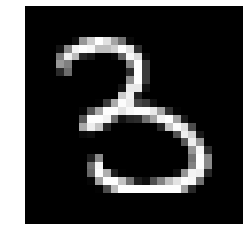

In [86]:
init=tf.global_variables_initializer()

def suerte(imagen):
    predi  = sess.run(prediccion,feed_dict={x: mnist.test.images[imagen].reshape(1,784)})
    print("La imagen es: {:}".format (predi))
    #plt.imshow(mnist.test.images[imagen].reshape((28,28)), cmap="gray")
    #plt.axis('off')
    ver_imagen(imagen)

with tf.Session() as sess:
    sess.run(init)
    for i in range(5000):
      # trabajando con lotes (batch)
      input_batch, labels_batch = mnist.train.next_batch(100)
      feed_dict = {x: input_batch, y: labels_batch}

      # corro el entrenamiento
      train_step.run(feed_dict=feed_dict)
      # imprimo el aprendizaje cada 100 pasos
      if i%100 == 0:
        train_accuracy = aprendizaje.eval(feed_dict=feed_dict)
        print("Paso %d, Exactitud de aprendizaje en el lote: %g %%"%(i, train_accuracy*100))
    # evaluación de grupo de test
    test_accuracy = aprendizaje.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels})
    print("---------------------------------------------------")
    print("Exactitud de aprendizaje en grupo de test : %g %%"%(test_accuracy*100))
    # hoy tendré suerte
    suerte(524)